In [1]:
from fast import *
from matplotlib import pyplot
from sympy import sin,cos,exp,sqrt,pi,zeros,I
%matplotlib inline
init_printing()
print_ascii=True
print_ascii=False

In [2]:
path="folder_05___Two_level_atom_symbolic/" 
name='suite'

We will be deriving the optical Bloch equations for a two level system as that in the figure.

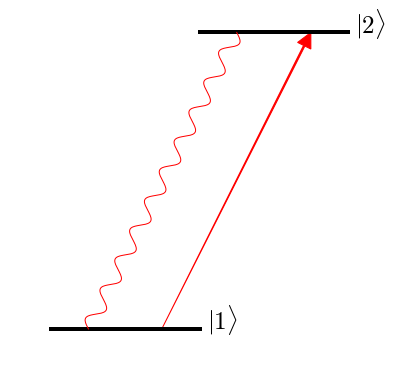

In [3]:
fig=pyplot.figure(figsize=(6, 6)); ax=fig.add_subplot(111,aspect="equal")

p1=[0.5,1]; p2=[1.5,3]
draw_state(ax,p1,text=r"$|1\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)
draw_state(ax,p2,text=r"$|2\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)

excitation(ax,[p1[0]+0.25,p1[1]],[p2[0]+0.25,p2[1]], fc="red", ec="red",width=0.01, head_width=0.1, head_length=0.1)
decay(     ax,[p1[0]-0.25,p1[1]],[p2[0]-0.25,p2[1]], 0.05,10.0,color="red",linewidth=1.0)

pyplot.axis('off')
pyplot.savefig(path+name+'_diagram.png',bbox_inches="tight")

We define the number of states and of radiation fields.

In [4]:
Ne=2
Nl=1

We define the variables related to the laser field.

In [5]:
E0,omega_laser=define_laser_variables(Nl)
fprint(E0,print_ascii=print_ascii)

In [6]:
fprint(omega_laser,print_ascii=print_ascii)

We define a few important symbols.

In [7]:
t,hbar,e=symbols("t hbar e",positive=True)
fprint([t,hbar,e],print_ascii=print_ascii)

We write an electric field propagating trough the $\hat{x}$ direction polarized in the $\hat{z}$ direction. First the wave vector:

In [8]:
phi=0; theta=pi/2; alpha=pi/2; beta=0

k=Matrix([cos(phi)*sin(theta),sin(phi)*sin(theta),cos(theta)])
fprint(k,print_ascii=print_ascii)

The polarization vectors.

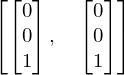

In [9]:
ep=polarization_vector(phi,theta,alpha,beta, 1)
em=polarization_vector(phi,theta,alpha,beta,-1)
fprint([ep,em],print_ascii=print_ascii)

The electric field (evaluated in $\vec{R}=0$).

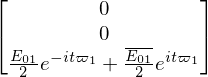

In [10]:
E_cartesian=(E0[0]/2*ep*exp(-I*omega_laser[0]*t) + E0[0].conjugate()/2*em*exp( I*omega_laser[0]*t))
fprint(E_cartesian,print_ascii=print_ascii)

We draw this electric field.

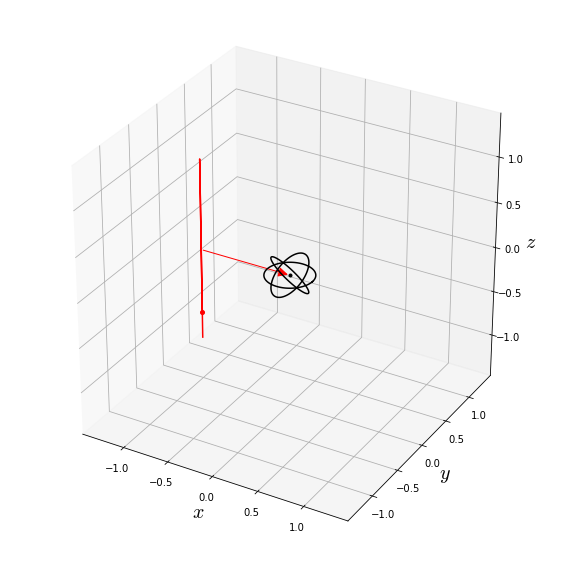

In [11]:
l1=PlaneWave(phi,theta,0,0,color="red")
laseres=[l1]
Nl=len(laseres)

fig = pyplot.figure(figsize=(10, 10)); ax = fig.gca(projection='3d')
draw_lasers_3d(ax,laseres,path+'lasers.png')

We write the electric field in the helicity basis (see notebook "Vectors in the helicity basis and the electric field").

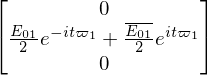

In [12]:
E=cartesian_to_helicity(E_cartesian)
fprint(E,print_ascii=print_ascii)

We define the position operator in the helicity basis.

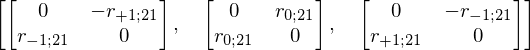

In [13]:
r=define_r_components(Ne,helicity=True,explicitly_hermitian=True)
fprint(r,print_ascii=print_ascii)

The frequencies of the energy levels, the resonant frequencies, and the decay frequencies.

In [14]:
omega_level,omega,gamma=define_frequencies(Ne,explicitly_antisymmetric=True)
fprint(omega_level,print_ascii=print_ascii)

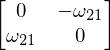

In [15]:
fprint(omega,print_ascii=print_ascii)

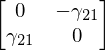

In [16]:
fprint(gamma,print_ascii=print_ascii)

The atomic hamiltonian is

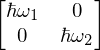

In [17]:
H0=Matrix([[hbar*omega_level[i]*KroneckerDelta(i,j) for j in range(Ne)] for i in range(Ne)])
fprint(H0,print_ascii=print_ascii)

The interaction hamiltonian is

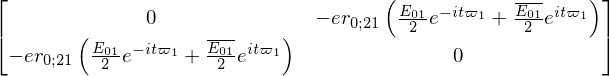

In [18]:
H1=-e*helicity_dot_product(E,r)
fprint(H1,print_ascii=print_ascii)

and the complete hamiltonian is

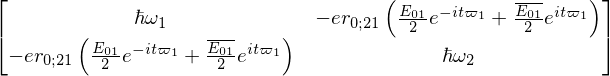

In [19]:
H=H0+H1
fprint(H,print_ascii=print_ascii)

# Rotating wave approximation
Notice that the electric field can be separated by terms with positive and negative frequency:

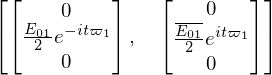

In [20]:
E_cartesian_p=E0[0]            /2*ep*exp(-I*omega_laser[0]*t)
E_cartesian_m=E0[0].conjugate()/2*em*exp( I*omega_laser[0]*t)

E_p=cartesian_to_helicity(E_cartesian_p)
E_m=cartesian_to_helicity(E_cartesian_m)

fprint([E_p,E_m],print_ascii=print_ascii)

We check that this decomposition actually equalls the field

In [21]:
fprint( simplify(E-(E_p+E_m)) ,print_ascii=print_ascii)

The position operator can also be separated in this way. We go to the interaction picture (with $\hat{H}_0$ as the undisturbed hamiltonian)

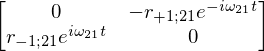

In [22]:
r_I=[ Matrix([[exp(I*omega[i,j]*t)*r[p][i,j] for j in range(Ne)] for i in range(Ne)]) for p in range(3)]
fprint(r_I[0],print_ascii=print_ascii)

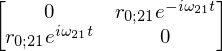

In [23]:
fprint(r_I[1],print_ascii=print_ascii)

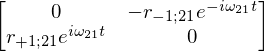

In [24]:
fprint(r_I[2],print_ascii=print_ascii)

Which can be decomposed as

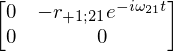

In [25]:
r_I_p=[ Matrix([[ delta_greater(j,i)*exp(-I*omega[j,i]*t)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_I_p[0],print_ascii=print_ascii)

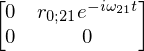

In [26]:
fprint(r_I_p[1],print_ascii=print_ascii)

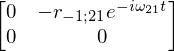

In [27]:
fprint(r_I_p[2],print_ascii=print_ascii)

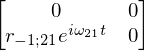

In [28]:
r_I_m=[ Matrix([[ delta_lesser( j,i)*exp( I*omega[i,j]*t)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_I_m[0],print_ascii=print_ascii)

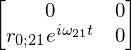

In [29]:
fprint(r_I_m[1],print_ascii=print_ascii)

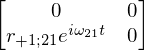

In [30]:
fprint(r_I_m[2],print_ascii=print_ascii)

that summed equal $\vec{\hat{r}}_I$

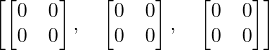

In [31]:
fprint( [r_I[p]-(r_I_p[p]+r_I_m[p]) for p in range(3)] ,print_ascii=print_ascii)

Thus the interaction hamiltonian in the interaciton picture is
\begin{equation}
    \hat{H}_{1I}=e\vec{E}\cdot \vec{\hat{r}}_I= e(\vec{E}^{(+)}\cdot \vec{\hat{r}}^{(+)}_I + \vec{E}^{(+)}\cdot \vec{\hat{r}}^{(-)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(+)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(-)}_I)
\end{equation}

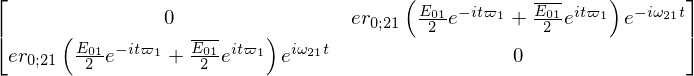

In [32]:
H1I=e*helicity_dot_product(E,r_I)
fprint(H1I,print_ascii=print_ascii)

Since both $\omega^l$ and $\omega_{ij}$ are in the order of THz, the terms that have frequencies with the same sign are summed, and thus also of the order of THz. The frequencies in the terms with oposite signs however, are detunings of the order of MHz. Since we are only interested in the coarse-grained evolution of the density matrix, we may omit the fast terms and approximate

\begin{equation}
    \hat{H}_{1I} \simeq \hat{H}_{1I,RWA}= e( \vec{E}^{(+)}\cdot \vec{\hat{r}}^{(-)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(+)}_I )
\end{equation}

That is known as the rotating wave approximation (RWA).

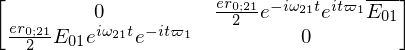

In [33]:
H1IRWA=e*(helicity_dot_product(E_p,r_I_m)+helicity_dot_product(E_m,r_I_p))
fprint(H1IRWA,print_ascii=print_ascii)

 Returning to the Schrödinger picture we have.

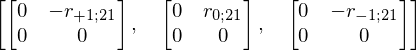

In [34]:
r_p=[ Matrix([[ delta_greater(j,i)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_p,print_ascii=print_ascii)

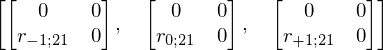

In [35]:
r_m=[ Matrix([[ delta_lesser( j,i)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_m,print_ascii=print_ascii)

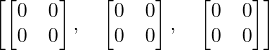

In [36]:
fprint( [r[p]-(r_p[p]+r_m[p]) for p in range(3)] ,print_ascii=print_ascii)

Thus the interaction hamiltonian in the Schrödinger picture in the rotating wave approximation is

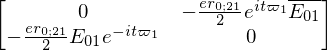

In [37]:
H1RWA=-e*(helicity_dot_product(E_p,r_m)+helicity_dot_product(E_m,r_p))
fprint(H1RWA,print_ascii=print_ascii)

And the complete hamiltonian in the Schrödinger picture in the rotating wave approximation is

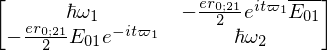

In [38]:
HRWA=H0+H1RWA
fprint(HRWA,print_ascii=print_ascii)

# Rotating Frame
Next we will make a phase transformation in order to eliminate the explicit time dependance of the equations.

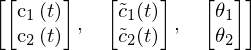

In [39]:
c,ctilde,phase=define_psi_coefficients(Ne)
fprint([c,ctilde,phase], print_ascii=print_ascii)

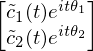

In [40]:
psi=Matrix([ exp(I*phase[i]*t)*ctilde[i] for i in range(Ne)])
fprint(psi, print_ascii=print_ascii)

The Schrödinger equation $i\hbar \partial_t |\psi\rangle=\hat{H}_{RWA}$ is

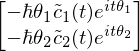

In [41]:
lhs=Matrix([(I*hbar*Derivative(psi[i],t).doit()).expand() for i in range(Ne)])
fprint(lhs, print_ascii=print_ascii)

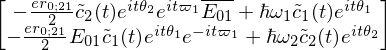

In [42]:
rhs=HRWA*psi
fprint(rhs, print_ascii=print_ascii)

We multiply each of these equations by $e^{-i \theta_i t}$ and substracting $i \theta_i \tilde{c}_i$

In [43]:
lhs_new=Matrix([simplify(  lhs[i]*exp(-I*phase[i]*t) +hbar*phase[i]*ctilde[i] ) for i in range(Ne)])
fprint(lhs_new, print_ascii=print_ascii)

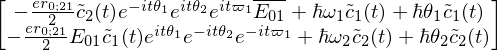

In [44]:
rhs_new=Matrix([simplify(  rhs[i]*exp(-I*phase[i]*t) +hbar*phase[i]*ctilde[i] ) for i in range(Ne)])
fprint(rhs_new, print_ascii=print_ascii)

It can be seen that the equations loose their explicit time dependance only if $\omega^{1} - \theta_{1} + \theta_{2}=0$. Which is satisfied if

In [45]:
phase_transformation=solve(omega_laser[0]+phase[1]-phase[0],phase[1],dict=True)[0]
fprint(phase_transformation,print_ascii=print_ascii)

There is a free parameter $\theta_1$, which is to be expected, since state vetors $|\psi\rangle$ always have a global phase invariance

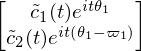

In [46]:
fprint(psi.subs(phase_transformation),print_ascii=print_ascii)

Thus the equations become

In [47]:
fprint(lhs_new, print_ascii=print_ascii)

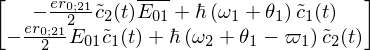

In [48]:
rhs_new=simplify(rhs_new.subs(phase_transformation))
fprint(rhs_new, print_ascii=print_ascii)

It can be seen that this is the Schrödinger equation derived from an effective hamiltonian $\tilde{H}$

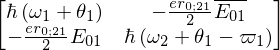

In [49]:
Htilde=Matrix([ [Derivative(rhs_new[i],ctilde[j]).doit() for j in range(Ne)] for i in range(Ne)])
fprint(Htilde, print_ascii=print_ascii)

We can see that it is convenient to choose $\theta_1=-\omega_1$ to simplify the hamiltonian. Also, we can recognize $\omega^1-\omega_2+\omega_1=\delta$ as the detuning of the laser field relative to the atomic transition $\omega_{21}=\omega_2-\omega_1$.

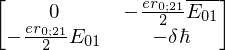

In [50]:
delta=Symbol("delta",real=True)
Htilde=Htilde.subs({phase[0]:-omega_level[0]}).subs({omega_laser[0]:delta+omega_level[1]-omega_level[0]})
fprint(Htilde, print_ascii=print_ascii)

If we define the Rabi frequency $\Omega =e E_0^1 r_{0;21}/\hbar$

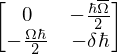

In [51]:
Omega=Symbol("Omega",real=False)
Htilde=Htilde.subs({E0[0]:Omega*hbar/r[1][1,0]/e})
fprint(Htilde,print_ascii=print_ascii)

We define the density matrix.

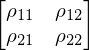

In [52]:
rho=define_density_matrix(Ne)
fprint( rho , print_ascii=print_ascii)

The hamiltonian part of the equations is
\begin{equation}
    \dot{\hat{\rho}}=\frac{i}{\hbar}[\hat{\rho}, \hat{\tilde{H}}]
\end{equation}

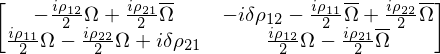

In [53]:
hamiltonian_terms=(I/hbar*(rho*Htilde-Htilde*rho)).expand()
fprint(hamiltonian_terms,print_ascii=print_ascii)

There is only one Lindblad operator, since there is only one spontaneous decay channel.

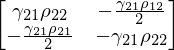

In [54]:
lindblad_terms=gamma[1,0]*lindblad_operator(ket(1,Ne)*bra(2,Ne),rho)
fprint(lindblad_terms, print_ascii=print_ascii)

# Optical Bloch Equations
$\textit{The}$ Optical Bloch equations are thus.

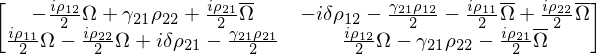

In [55]:
eqs=hamiltonian_terms + lindblad_terms
fprint(eqs,print_ascii=print_ascii)

which is how most literature will show the equations. However, a more convenient way to express this equations is to explicitly asume a normalized and hermitian density matrix

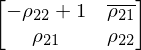

In [56]:
rho=define_density_matrix(Ne,explicitly_hermitian=True,normalized=True)
fprint( rho ,print_ascii=print_ascii)

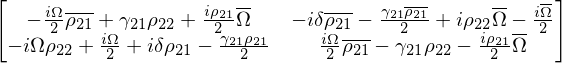

In [57]:
hamiltonian_terms = (I/hbar*(rho*Htilde-Htilde*rho)).expand()
lindblad_terms    =gamma[1,0]*lindblad_operator(ket(1,Ne)*bra(2,Ne),rho)
eqs=hamiltonian_terms + lindblad_terms
fprint(eqs,print_ascii=print_ascii)

and only consider the equations for the populations $\rho_{ii}$ for $i>1$ and the real and imaginary parts of the coherences below the diagonal.

In [58]:
ss_comp={ rho[i,j]:re(rho[i,j])+I*im(rho[i,j]) for j in range(Ne) for i in range(Ne)}
fprint( re(eqs[1,1].subs(ss_comp)) ,print_ascii=print_ascii)

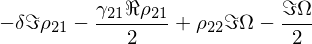

In [59]:
fprint( re(eqs[1,0].subs(ss_comp)) ,print_ascii=print_ascii)

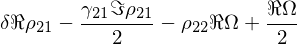

In [60]:
fprint( im(eqs[1,0].subs(ss_comp)) ,print_ascii=print_ascii)

If the density matrix is represented as a vector whose components are the these independent components of the density matrix

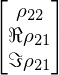

In [61]:
rho_vect=define_rho_vector(rho,Ne)
fprint(rho_vect,print_ascii=print_ascii)

Then the equations can be re-written as linear combinations of these components plus an independent term.
\begin{equation}
    \dot{\vec{\rho}} = \hat{A} \vec{\rho} - \vec{b}
\end{equation}
with $\hat{A}$ a linear operator acting in this vector space and $\vec{b}$ the vector of independent terms.

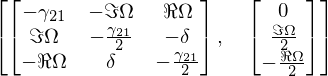

In [62]:
A, b = calculate_A_b(eqs, rho, Ne)
fprint([A, b], print_ascii=print_ascii)

Explicitly, this is

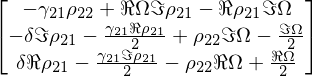

In [63]:
eqs_new=A*rho_vect - b
fprint(eqs_new,print_ascii=print_ascii)

Which is the same as the equations in the previous form.

In [64]:
fprint( eqs_new - Matrix([re(eqs[1,1]),re(eqs[1,0]),im(eqs[1,0])]).subs(ss_comp) ,print_ascii=print_ascii)

The steady state solution of this equations is

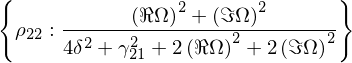

In [65]:
sol=solve(list(eqs_new),list(rho_vect))
fprint( {rho_vect[0]:sol[rho_vect[0]]} ,print_ascii=print_ascii)

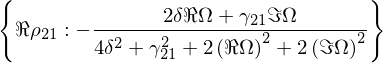

In [66]:
fprint( {rho_vect[1]:sol[rho_vect[1]]} ,print_ascii=print_ascii)

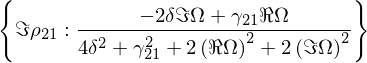

In [67]:
fprint( {rho_vect[2]:sol[rho_vect[2]]} ,print_ascii=print_ascii)

In [68]:
from sympy import I
Omega_amp,alpha=symbols("\Omega_a alpha",real=True)
ss={Omega:Omega_amp*exp(I*alpha)}
ss

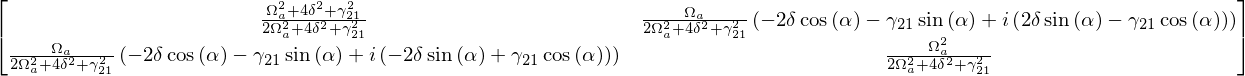

In [69]:
rho_steady = rho.subs(rho[1, 0], re(rho[1, 0])+I*im(rho[1, 0])).subs(sol).subs(ss)
rho_steady.simplify()
rho_steady

In [70]:
rho_steady21 = rho_steady[1, 0].args[0]*rho_steady[1, 0].args[1]*(gamma[1,0]*(I*exp(I*alpha))-2*delta*exp(I*alpha))
test = rho_steady[1, 0]-rho_steady21
re(test)+I*im(test)

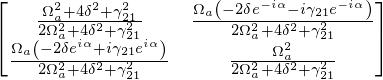

In [71]:
rho_steady[1, 0] = rho_steady21
rho_steady[0, 1] = rho_steady21.conjugate()
rho_steady

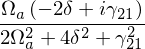

In [86]:
rho_steady[1, 0].subs(alpha, 0)

According to literature [1], the solution should be

In [72]:
s0=2*(re(Omega)**2+im(Omega)**2)/gamma[1,0]**2

s=s0/(1+(2*delta/gamma[1,0])**2)

rho21=I*Omega/(2*(gamma[1,0]/2-I*delta)*(1+s))

rerho22=( s/(2*(1+s)) ).simplify()
rerho21=re(rho21).simplify()
imrho21=im(rho21).simplify()

test=[ sol[rho[1,1]]-rerho22, sol[re(rho[1,0])]-rerho21, sol[im(rho[1,0])]-imrho21 ]

fprint( [testi.subs({Omega:re(Omega)+I*im(Omega)}).factor() for testi in test] ,print_ascii=print_ascii)

So our derivation produces the same results as the literature.

The full width at half maximum of $\rho_{22}$ is

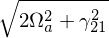

In [73]:
hm1,hm2=solve(sol[rho[1,1]]-sol[rho[1,1]].subs({delta:0})/2,delta)
FWHM=hm2-hm1
FWHM=FWHM.subs(ss).simplify()
fprint(FWHM, print_ascii=print_ascii)

The saturation intensity is defined as the intensity needed to accumulate $\frac{1}{4}$ of the population in the excited state when the field is in resonance ($\delta=0$).

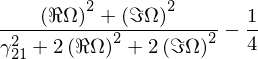

In [74]:
saturation_eq=sol[rho[1,1]].subs({delta:0})-1/Integer(4)
fprint( saturation_eq ,print_ascii=print_ascii)

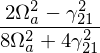

In [75]:
saturation_eq= saturation_eq.subs(ss).factor().simplify()
fprint(saturation_eq,print_ascii=print_ascii)

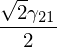

In [76]:
Omega_sat=solve( saturation_eq ,Omega_amp)[1]
fprint(Omega_sat, print_ascii=print_ascii)

This steady state of resonant saturation is

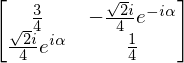

In [84]:
rho_sat = rho_steady.subs(delta, 0).subs(Omega_amp, Omega_sat)
rho_sat

Since $\Omega =e E_{01} r_{0;21}/\hbar$ it follows that

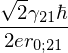

In [78]:
E0_sat=Omega_sat*hbar/e/r[1][1,0]
fprint(E0_sat, print_ascii=print_ascii)

And the saturation intensity $I_0$ is

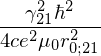

In [79]:
mu0, c = symbols("mu0, c", positive=True)
Isat = E0_sat**2/(2*mu0*c)
Isat

The height of the $\tilde{\rho}_{22}$ peak as a function of the saturation parameter $s_0 = I/I_0$ is

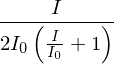

In [80]:
s0, I, I0 = symbols("s0, I, I0", real=True)
rho22_height = sol[rho[1, 1]].subs(ss).factor().simplify()
rho22_height = rho22_height.subs(Omega_amp, Omega_sat*sqrt(s0)).subs(delta, 0).factor()
rho22_height = rho22_height.subs(s0, I/I0)

rho22_height

And the full width at half maximum is

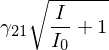

In [81]:
rho22_fwhm = sol[rho[1, 1]].subs(ss).factor().simplify()
rho22_fwhm = rho22_fwhm.subs(Omega_amp, Omega_sat*sqrt(s0))
rho22_fwhm = rho22_fwhm.subs(delta, 0)/2 - rho22_fwhm
rho22_fwhm = solve(rho22_fwhm, delta)
rho22_fwhm = rho22_fwhm[1]-rho22_fwhm[0]
rho22_fwhm = rho22_fwhm.subs(s0, I/I0)
rho22_fwhm

[1]  H.J. Metcalf and P. van der Straten. Laser Cooling and Trapping. Graduate Texts in Contempo-
rary Physics. Springer New York, 2001.